In [1]:
# Performed with reference from Computer science you tube channel
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [3]:
# Downloading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)

uint8
uint8
uint8
uint8


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

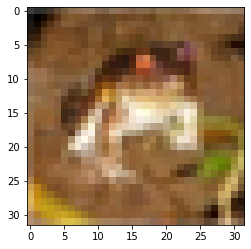

In [10]:
img=plt.imshow(x_train[0])

In [11]:
print("The image label is : ", y_train[0])

The image label is :  [6]


In [12]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
print("The image is :", classification[6])

The image is : frog


In [14]:
#Source for classification : https://www.cs.toronto.edu/~kriz/cifar.html

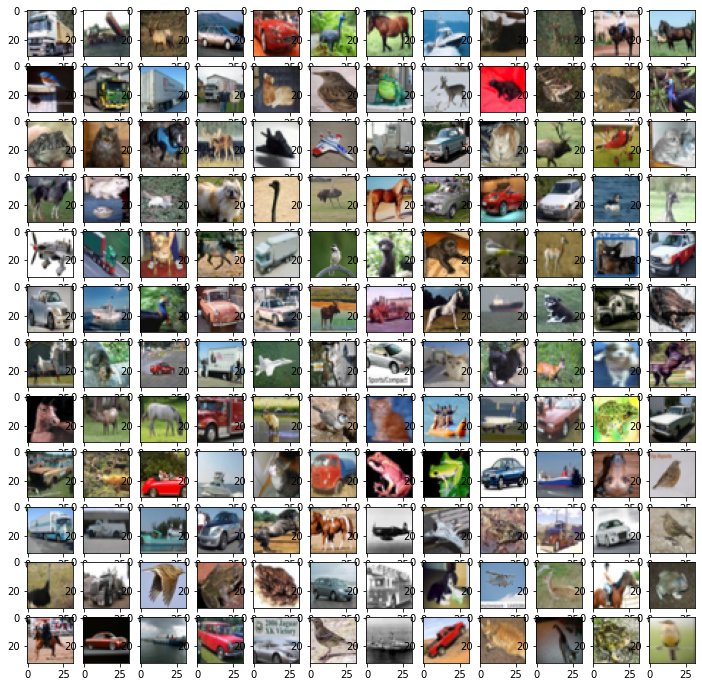

In [15]:
fig=plt.figure(figsize=(12, 12))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

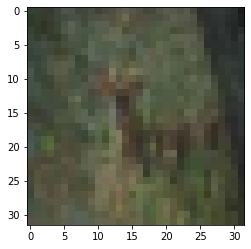

In [16]:
img=plt.imshow(x_train[10])

In [17]:
print("The image is :", classification[y_train[10][0]])

The image is : deer


In [18]:
y_train_one_hot=to_categorical(y_train)

In [19]:
y_test_one_hot=to_categorical(y_test)

In [20]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [22]:
x_train=x_train/255
x_test=x_test/255

In [23]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
Tr=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 345ms/step - loss: 1.7859 - accuracy: 0.3391 - val_loss: 1.6236 - val_accuracy: 0.4165
Epoch 2/10
157/157 [==============================] - 54s 344ms/step - loss: 1.4220 - accuracy: 0.4812 - val_loss: 1.3930 - val_accuracy: 0.4976
Epoch 3/10
157/157 [==============================] - 54s 343ms/step - loss: 1.2590 - accuracy: 0.5485 - val_loss: 1.2331 - val_accuracy: 0.5608
Epoch 4/10
157/157 [==============================] - 54s 344ms/step - loss: 1.1469 - accuracy: 0.5888 - val_loss: 1.0828 - val_accuracy: 0.6219
Epoch 5/10
157/157 [==============================] - 54s 345ms/step - loss: 1.0586 - accuracy: 0.6219 - val_loss: 1.0804 - val_accuracy: 0.6172
Epoch 6/10
157/157 [==============================] - 55s 352ms/step - loss: 0.9890 - accuracy: 0.6489 - val_loss: 1.0117 - val_accuracy: 0.6479
Epoch 7/10
157/157 [==============================] - 57s 366ms/step - loss: 0.9162 - accuracy: 0.6755 - val_loss: 0.9536 - val_ac

In [27]:
model.evaluate(x_test,y_test_one_hot)

313/313 [==============================] - 5s 15ms/step - loss: 1.0250 - accuracy: 0.6515


[1.0249593257904053, 0.6514999866485596]

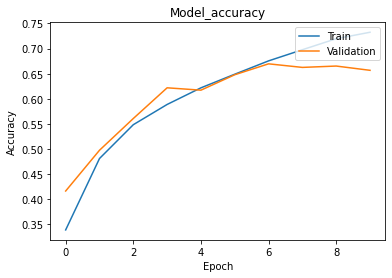

In [28]:
plt.plot(Tr.history['accuracy'])
plt.plot(Tr.history['val_accuracy'])
plt.title('Model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


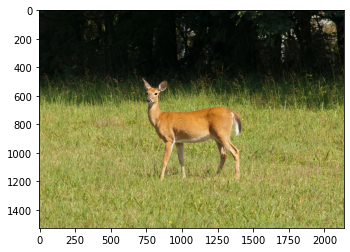

In [31]:
new_img=plt.imread('/content/drive/My Drive/deer1.jpg')
img=plt.imshow(new_img)

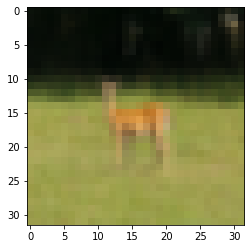

In [32]:
from skimage.transform import resize
resized_image=resize(new_img,(32,32,3))
img=plt.imshow(resized_image)


In [35]:
# Testing the model
predictions=model.predict(np.array([resized_image]))
predictions

array([[1.2580027e-03, 3.4773708e-04, 8.4375285e-02, 2.1197641e-02,
        8.6076760e-01, 7.2025284e-03, 1.3481707e-02, 1.0726732e-02,
        3.6972723e-04, 2.7306602e-04]], dtype=float32)

In [36]:
result=np.argmax(predictions,axis=1)
result

array([4])

In [37]:
print("The image is :", classification[4])

The image is : deer
